### Logistic回归的一般过程：

1、收集数据：采用任意方法收集数据。  
2、准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳。  
3、分析数据：采用任意方法对数据进行分析。  
4、训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。  
5、测试算法：一旦训练步骤完成，分类将会很快。  
6、使用算法：首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数，就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。  

Logistic回归的目的是寻找一个非线性函数Sigmoid的最佳拟合参数，求解过程可以由最优化算法完成。  
为什么不用线性回归的代价函数表示，因为线性回归的代价函数可能是非凸的，对于分类问题，使用梯度下降很难得到最小值，上面的代价函数是凸函数。

In [70]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [71]:
def readData(fileName, split, dataType):
    data = np.loadtxt(fileName, delimiter=split, dtype=dataType)
    X = data[:, :-1]
    y = data[:,-1]
    return X, y

# 显示二维图形
def plot_data(X,y):
    pos = np.where(y==1)    #找到y==1的坐标位置
    neg = np.where(y==0)    #找到y==0的坐标位置
    #作图
    plt.figure(figsize=(15,12))
    plt.plot(X[pos,0],X[pos,1],'ro')        # red o
    plt.plot(X[neg,0],X[neg,1],'bo')        # blue o
    plt.title("data")
    plt.show()

In [72]:
# 映射为多项式 
def mapFeature(X1,X2):
    degree = 2;                     # 映射的最高次方
    out = np.ones((X1.shape[0],1))  # 映射后的结果数组（取代X）
    '''
    这里以degree=2为例，映射为1,x1,x2,x1^2,x1,x2,x2^2
    '''
    for i in np.arange(1,degree+1): 
        for j in range(i+1):
            temp = X1**(i-j)*(X2**j)    #矩阵直接乘相当于matlab中的点乘.*
            out = np.hstack((out, temp.reshape(-1,1)))
    return out

#画决策边界
def plotDecisionBoundary(theta,X,y):
    pos = np.where(y==1)    #找到y==1的坐标位置
    neg = np.where(y==0)    #找到y==0的坐标位置
    #作图
    plt.figure(figsize=(15,12))
    plt.plot(X[pos,0],X[pos,1],'ro')        # red o
    plt.plot(X[neg,0],X[neg,1],'bo')        # blue o
    plt.title(u"决策边界")
    
    #u = np.linspace(30,100,100)
    #v = np.linspace(30,100,100)
    
    u = np.linspace(-1,1.5,50)  #根据具体的数据，这里需要调整
    v = np.linspace(-1,1.5,50)
    
    z = np.zeros((len(u),len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(mapFeature(u[i].reshape(1,-1),v[j].reshape(1,-1)),theta)    # 计算对应的值，需要map
    
    z = np.transpose(z)
    plt.contour(u,v,z,[0,0.01],linewidth=2.0)   # 画等高线，范围在[0,0.01]，即近似为决策边界
    #plt.legend()
    plt.show()

In [73]:
def sigmoid(z):
    #h = np.zeros(len(z), 1)
    h = 1.0 / (1 + np.exp(-z))
    return h
    
def lossFunction(X, y, init_w, init_lambda):
    m = len(y)
    z = np.dot(X, init_w) # 计算h(z)
    init_w1 = init_w.copy() # 因为正则化j=1从1开始，不包含0，所以复制一份，前theta(0)值为0 
    init_w1[0] = 0   
    h = sigmoid(z) 
    tmp_w = np.dot(np.transpose(init_w1), init_w1)
    J = (-np.dot(np.transpose(y), np.log(h)) - np.dot(np.transpose(1-y), np.log(1-h)) + tmp_w*init_lambda/2)/m
    return J

In [74]:
def gradientDescent(X, y, lr, iters, init_lambda):
    m = len(X)   # m 为行
    n = len(X[0])   # n为列
    yMat = np.mat(y)
    
    weights = np.ones((n, 1))
    loss = np.zeros((iters, 1))
    weights = weights.copy()
    weights[0] = 0
    for i in range(iters):
        z = np.dot(X, weights)
        h = sigmoid(z)
        
        #J对w的偏导数 = X.transpose * (Y - g(X*w))
        error = h - yMat.transpose()
        weights = weights - lr*np.dot(X.transpose(), error) #+ init_lambda/m*weights) #正则化的梯度
        loss[i] = lossFunction(X, y, weights, init_lambda)
    print('weights: ', weights)
    print("loss: ", loss)
    return weights.getA(), loss

In [75]:
# 预测
def predict(X, weight):
    m = X.shape[0]
    p = np.zeros((m,1))
    p = sigmoid(np.dot(X,weight))    # 预测的结果，是个概率值
    
    for i in range(m):
        if p[i] > 0.5:  #概率大于0.5预测为1，否则预测为0
            p[i] = 1
        else:
            p[i] = 0
    return p

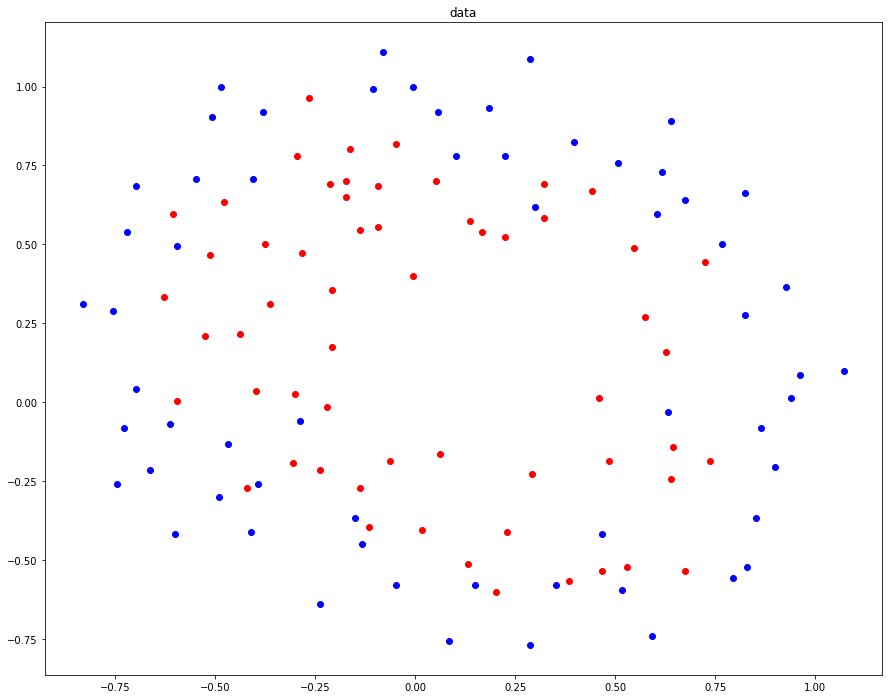

weights:  [[  6.7327819 ]
 [  3.07871038]
 [  4.63527312]
 [-13.43953014]
 [ -7.88873979]
 [-14.5644838 ]]
loss:  [[0.83883012]
 [0.82336765]
 [0.80944015]
 ...
 [0.57885458]
 [0.5788562 ]
 [0.57885781]]
在训练集上的准确度为79.166667%


/Users/bingao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: The following kwargs were not used by contour: 'linewidth'
/Users/bingao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20915 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bingao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31574 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bingao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36793 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bingao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bingao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180

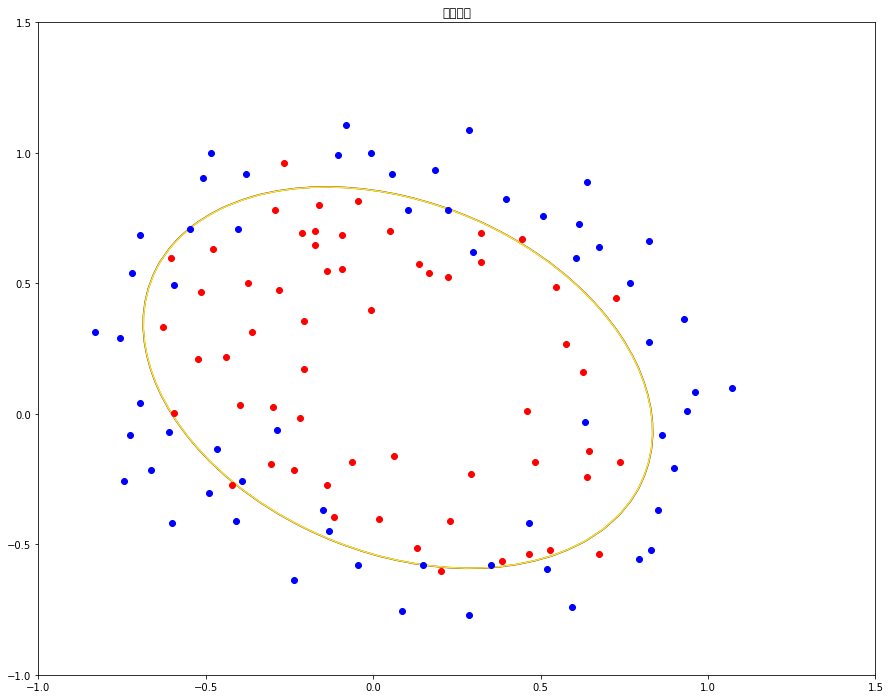

In [76]:
X, y = readData('./data/data2.txt', ',', np.float64)
plot_data(X,y)
X1 = mapFeature(X[:,0],X[:,1])#映射为多项式
# 80% as training dataset, 20% as validation dataset
ratio = 0.8
weights, loss = gradientDescent(X1[:int(X1.shape[0]*ratio), :], y[:int(X1.shape[0]*ratio)], 0.01, 10000, 0.1)
p = predict(X1[int(X1.shape[0]*ratio): , :], weights)
print(u'在训练集上的准确度为%f%%'%np.mean(np.float64(p==y[int(X1.shape[0]*ratio):])*100))   # 与真实值比较，p==y返回True，转化为float
plotDecisionBoundary(weights,X,y)    #画决策边界  